In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("00_Pob_Inicio_1950_2070.csv", encoding="latin1")

Una vez cargado el archivo, comenzamos a conocer los datos

In [3]:
df.head

<bound method NDFrame.head of         RENGLON   AÑO             ENTIDAD  CVE_GEO  EDAD     SEXO  POBLACION
0             1  1950  República Mexicana        0     0  Hombres     577250
1             2  1950  República Mexicana        0     0  Mujeres     564734
2             3  1950  República Mexicana        0     1  Hombres     520692
3             4  1950  República Mexicana        0     1  Mujeres     511958
4             5  1950  República Mexicana        0     2  Hombres     487298
...         ...   ...                 ...      ...   ...      ...        ...
744915   744916  2071           Zacatecas       32   107  Mujeres         44
744916   744917  2071           Zacatecas       32   108  Hombres         75
744917   744918  2071           Zacatecas       32   108  Mujeres         26
744918   744919  2071           Zacatecas       32   109  Hombres         50
744919   744920  2071           Zacatecas       32   109  Mujeres         15

[744920 rows x 7 columns]>

In [4]:
df.shape

(744920, 7)

In [5]:
df.dtypes

RENGLON       int64
AÑO           int64
ENTIDAD      object
CVE_GEO       int64
EDAD          int64
SEXO         object
POBLACION     int64
dtype: object

In [6]:
df.describe()

,RENGLON,AÑO,CVE_GEO,EDAD,POBLACION
count,744920.0000,744920.000000,744920.000000,744920.000000,7.449200e+05
mean,372460.5000,2020.139693,15.905493,54.500000,3.289038e+04
std,215040.0256,29.729490,9.572587,31.752974,1.160257e+05
min,1.0000,1950.000000,0.000000,0.000000,0.000000e+00
25%,186230.7500,1995.000000,8.000000,27.000000,2.017000e+03
50%,372460.5000,2020.000000,16.000000,54.500000,1.018200e+04
75%,558690.2500,2046.000000,24.000000,82.000000,2.435625e+04
max,744920.0000,2071.000000,32.000000,109.000000,1.260813e+06


Buscamos valores nulos o faltantes.

In [6]:
df[df.isnull().any(axis=1)]

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744920 entries, 0 to 744919
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   RENGLON    744920 non-null  int64 
 1   AÑO        744920 non-null  int64 
 2   ENTIDAD    744920 non-null  object
 3   CVE_GEO    744920 non-null  int64 
 4   EDAD       744920 non-null  int64 
 5   SEXO       744920 non-null  object
 6   POBLACION  744920 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 39.8+ MB


<Axes: >

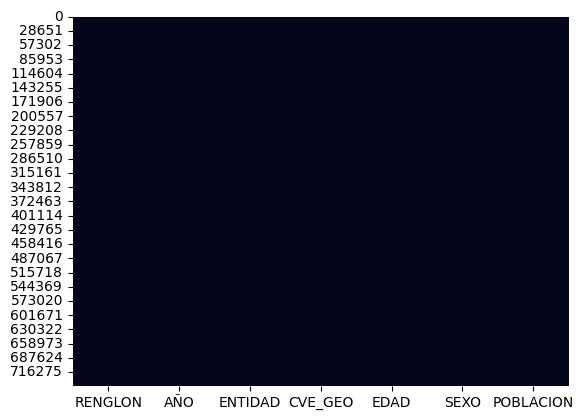

In [8]:
sbn.heatmap(df.isnull(), cbar=False)

No encontramos entradas de datos nulas.
Si hallasemos valores nulos, los podemos contar por columna y saber cuántos son con: Conteos_nulos=df["Col"].isnull().sum()

Se pueden eliminar con un "umbral" usando: df.dropna(thresh=umbral)

Buscamos valores duplicados en el identificador de columna.

In [9]:
df.duplicated(subset=["RENGLON"]).sum()

0

La columna "RENGLON" es el marcador de cada entrada de datos, en él no hallamos duplicados, por lo que eliminaremos esta columna. 

La columna "ENTIDAD" y "CVE_GEO" representan el mismo dato, por lo que mantenemos "ENTIDAD"

In [10]:
del df["RENGLON"]
del df["CVE_GEO"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744920 entries, 0 to 744919
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   AÑO        744920 non-null  int64 
 1   ENTIDAD    744920 non-null  object
 2   EDAD       744920 non-null  int64 
 3   SEXO       744920 non-null  object
 4   POBLACION  744920 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 28.4+ MB


Buscamos los valores únicos por columna mediante gráficas para que no exista el mismo dato escrito diferente.

Como cada gráfica está filtrada por ciertas columnas, solo basta cambiar ciertos parámetros para visualizar "AÑOS" y "ENTIDADES" diferentes.

In [11]:
df_entidad=df[["AÑO","ENTIDAD","POBLACION"]].groupby(["AÑO","ENTIDAD"]).sum().reset_index()
df_sexo_entidad=df[df["ENTIDAD"]=="República Mexicana"][["AÑO","SEXO","POBLACION"]].groupby(["AÑO","SEXO"]).sum().reset_index()

In [12]:
df_entidad

,AÑO,ENTIDAD,POBLACION
0,1950,República Mexicana,28114127
1,1951,República Mexicana,28812644
2,1952,República Mexicana,29509299
3,1953,República Mexicana,30277521
4,1954,República Mexicana,31061184
...,...,...,...
3381,2071,Tamaulipas,3772055
3382,2071,Tlaxcala,1749268
3383,2071,Veracruz,6037871
3384,2071,Yucatán,3049281


In [13]:
df_entidad_año=df_entidad[(df_entidad["AÑO"]==2024) & (df_entidad["ENTIDAD"] != "República Mexicana")]
df_entidad_año_SRep=df_entidad_año.sort_values(by="POBLACION", ascending=False)

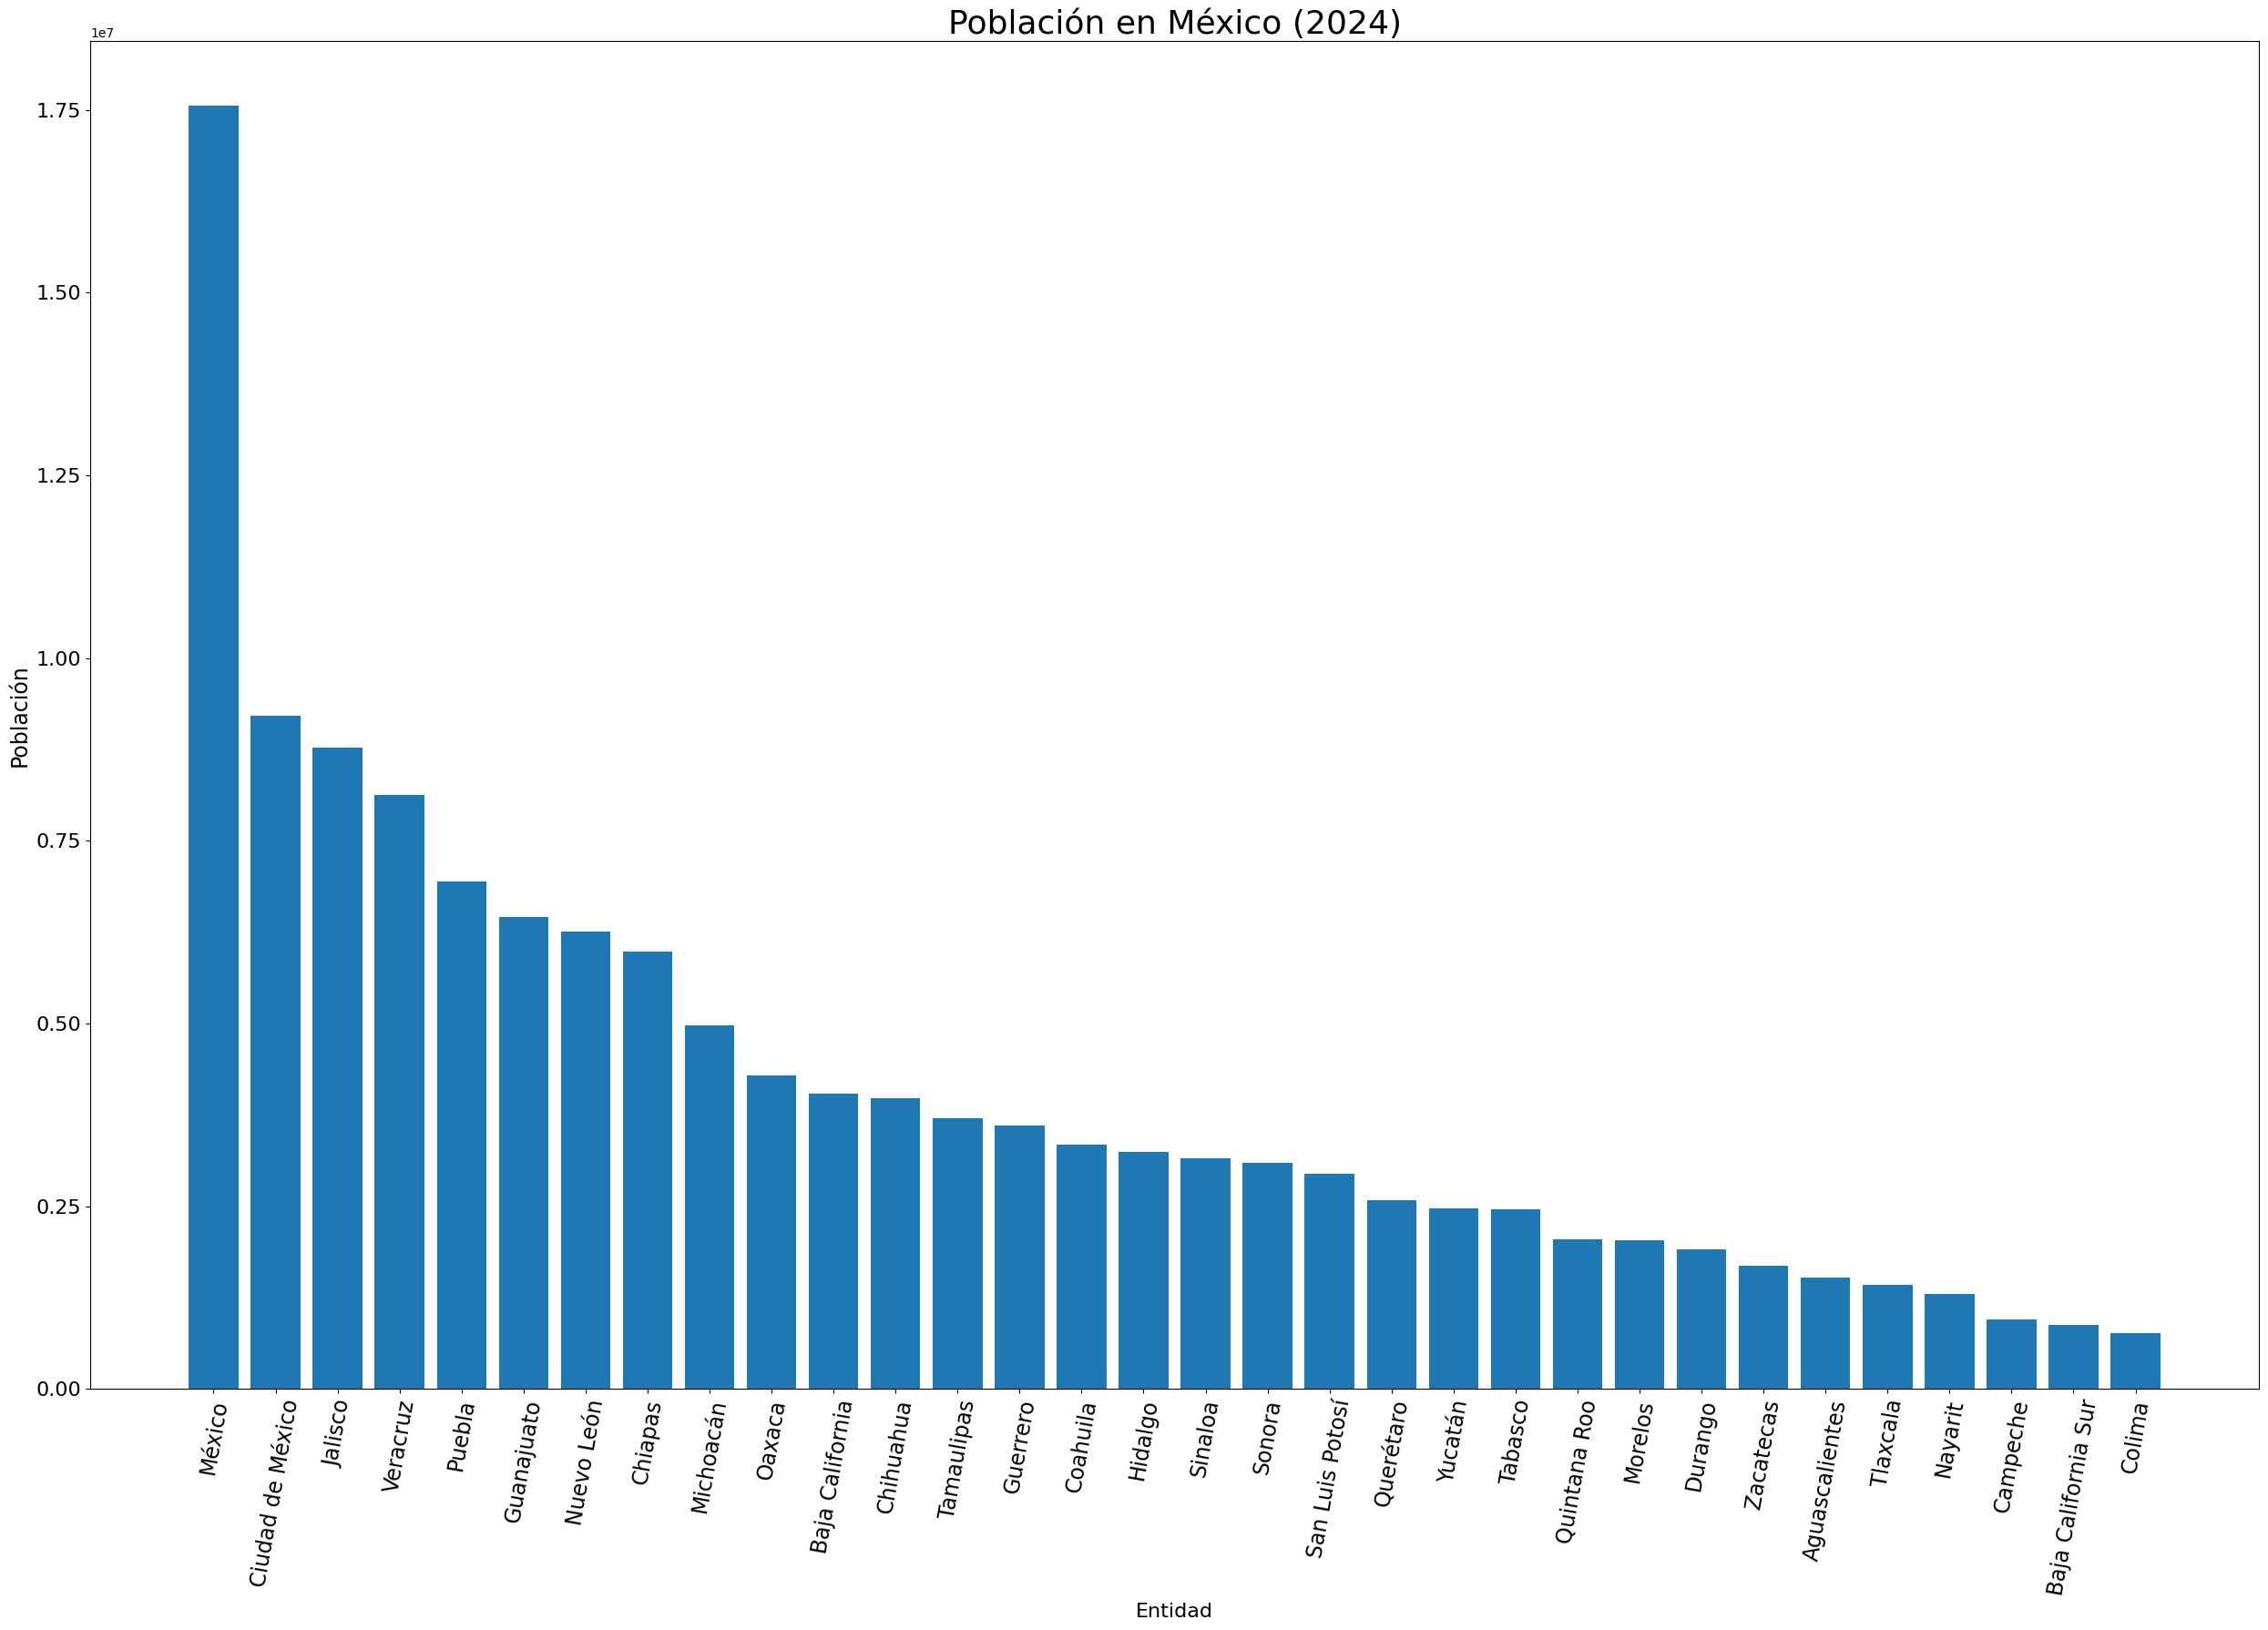

In [14]:
plt.figure(figsize=(25, 18))
plt.bar(df_entidad_año_SRep["ENTIDAD"],df_entidad_año_SRep["POBLACION"])

plt.title("Población en México (2024)",fontsize=26)
plt.xlabel("Entidad",fontsize=16)
plt.ylabel("Población", fontsize=17)
plt.xticks(rotation=80, fontsize=17)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

No encontramos datos repetidos en la columna "ENTIDAD". Además de que al ordenar los valores en forma descendente por la columna "POBLACION", tenemos el Top 5 estados con mayor crecimiento por año, para 2024:
1. Estado de México
2. Ciudad de México
3. Jalisco
4. Veracruz
5. Puebla

Otra forma de visualizar los datos es mediante una gráfica de pirámide poblacional.

In [15]:
df_edad_año_entidad=df[(df["AÑO"]==2024)&(df["ENTIDAD"]=="Ciudad de México")]
df_edad_año_entidad

,AÑO,ENTIDAD,EDAD,SEXO,POBLACION
398420,2024,Ciudad de México,0,Hombres,48867
398421,2024,Ciudad de México,0,Mujeres,46987
398422,2024,Ciudad de México,1,Hombres,47796
398423,2024,Ciudad de México,1,Mujeres,45885
398424,2024,Ciudad de México,2,Hombres,47043
...,...,...,...,...,...
398635,2024,Ciudad de México,107,Mujeres,16
398636,2024,Ciudad de México,108,Hombres,4
398637,2024,Ciudad de México,108,Mujeres,5
398638,2024,Ciudad de México,109,Hombres,3


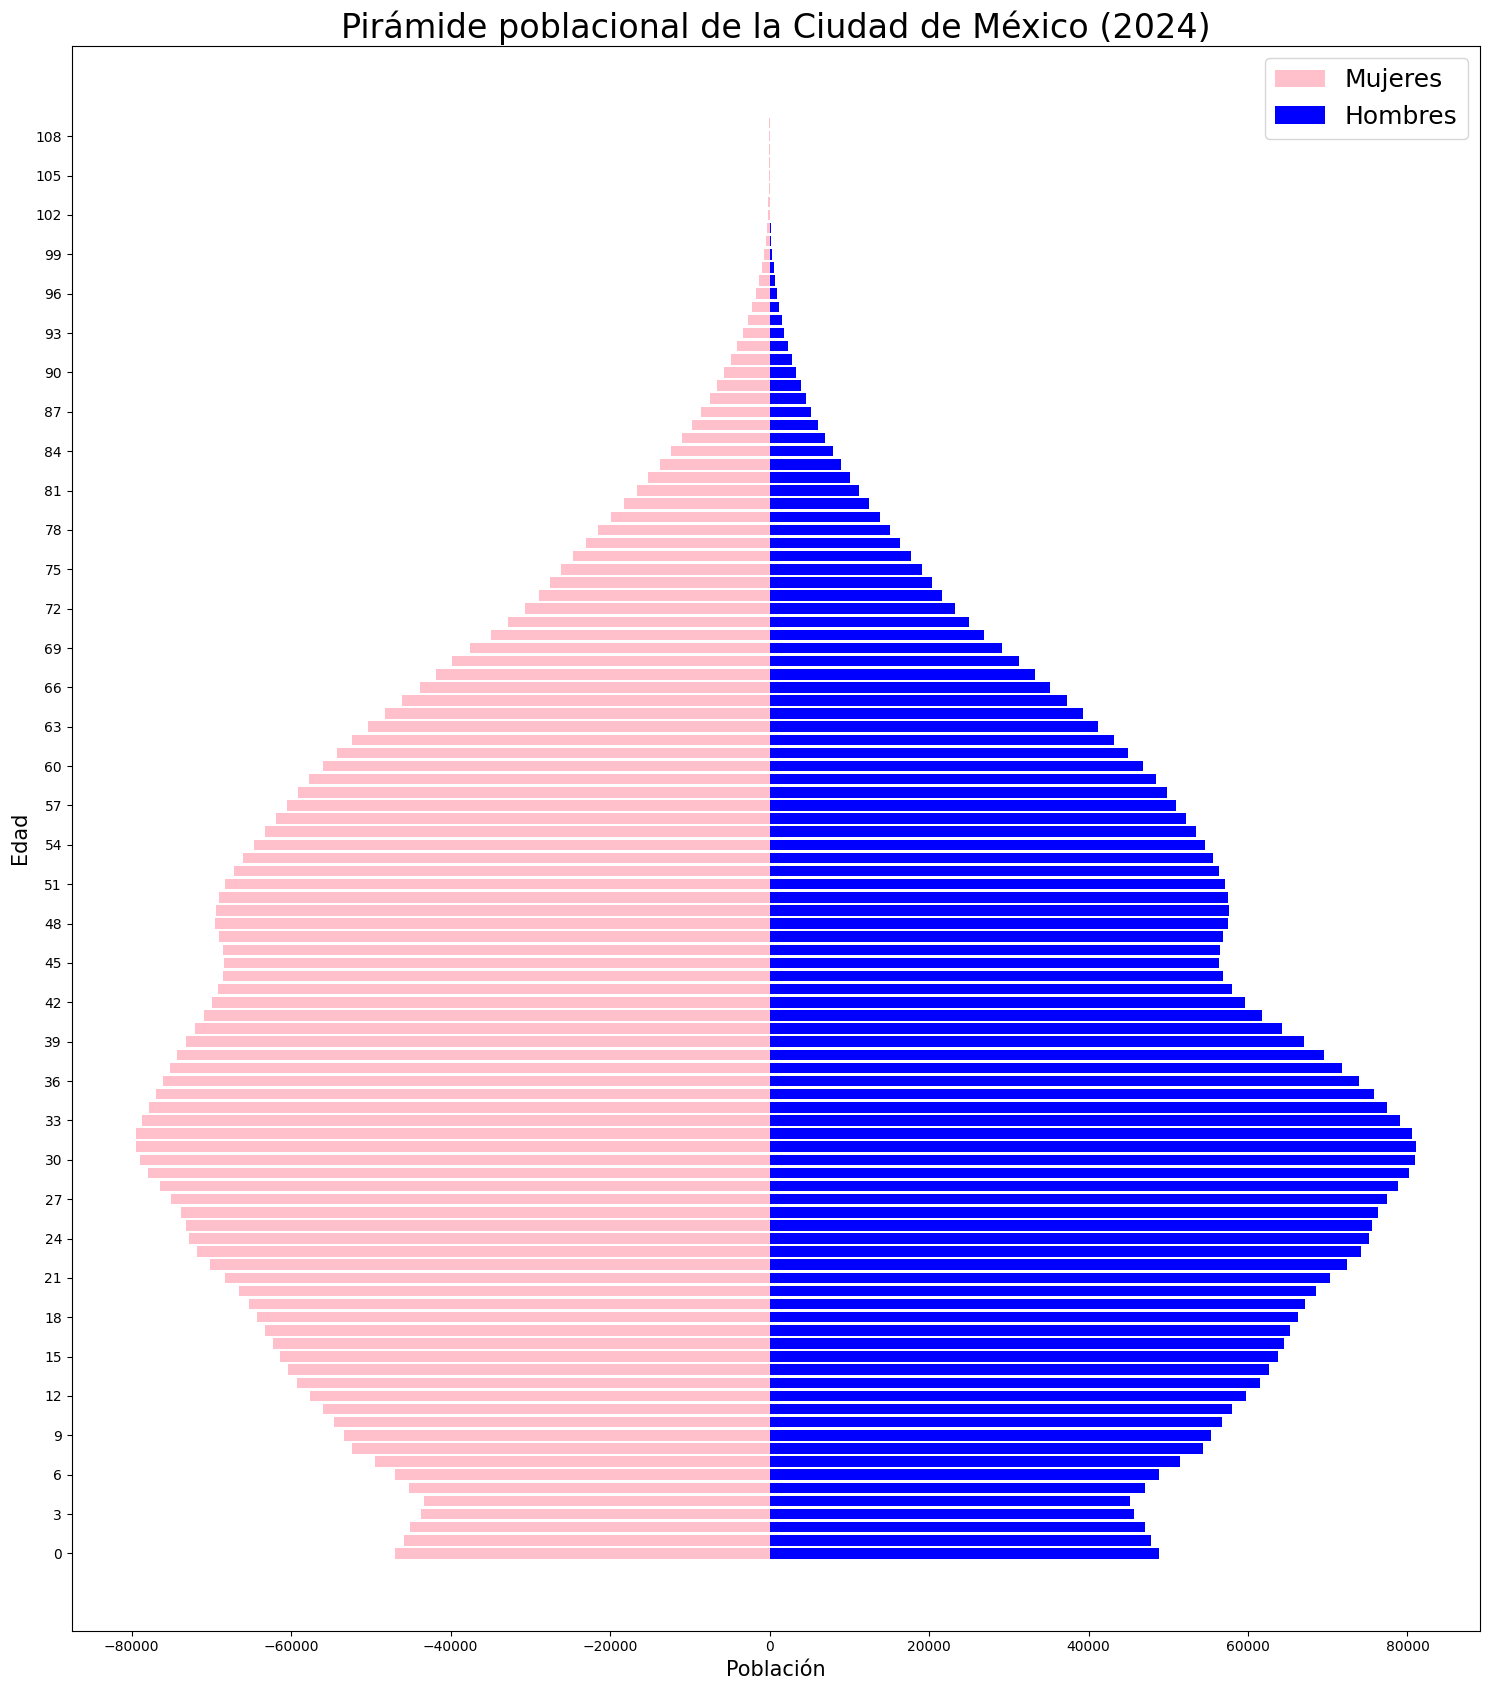

In [16]:
plt.figure(figsize=(15,17))

plt.barh(df_edad_año_entidad[df_edad_año_entidad["SEXO"]=="Mujeres"]["EDAD"], df_edad_año_entidad[df_edad_año_entidad["SEXO"]=="Mujeres"]["POBLACION"]*-1,height=0.8,color="pink",label="Mujeres")
plt.barh(df_edad_año_entidad[df_edad_año_entidad["SEXO"]=="Hombres"]["EDAD"], df_edad_año_entidad[df_edad_año_entidad["SEXO"]=="Hombres"]["POBLACION"], height=0.8,color="blue", label="Hombres")

plt.title("Pirámide poblacional de la Ciudad de México (2024)", fontsize=24)
plt.xlabel("Población", fontsize=15)
plt.ylabel("Edad", fontsize=15)
plt.yticks(range(0,109, 3))

plt.tight_layout()
plt.legend(loc="upper right", fontsize=18)
plt.show()


In [23]:
df_edad_top5_muj=df_edad_año_entidad[df_edad_año_entidad["SEXO"]=="Mujeres"].nlargest(5, columns="POBLACION")
df_edad_top5_muj

,AÑO,ENTIDAD,EDAD,SEXO,POBLACION
398483,2024,Ciudad de México,31,Mujeres,79472
398485,2024,Ciudad de México,32,Mujeres,79437
398481,2024,Ciudad de México,30,Mujeres,78927
398487,2024,Ciudad de México,33,Mujeres,78654
398479,2024,Ciudad de México,29,Mujeres,77944


In [30]:
df_edad_muj_total=df_edad_año_entidad[df_edad_año_entidad["SEXO"]=="Mujeres"]["POBLACION"].sum()
round(df_edad_top5_muj["POBLACION"].iloc[0]/df_edad_muj_total*100,2)

1.66

In [29]:
df_edad_top5_hom=df_edad_año_entidad[df_edad_año_entidad["SEXO"]=="Hombres"].nlargest(5, columns="POBLACION")
df_edad_top5_hom

,AÑO,ENTIDAD,EDAD,SEXO,POBLACION
398482,2024,Ciudad de México,31,Hombres,81067
398480,2024,Ciudad de México,30,Hombres,80930
398484,2024,Ciudad de México,32,Hombres,80513
398478,2024,Ciudad de México,29,Hombres,80211
398486,2024,Ciudad de México,33,Hombres,79091


In [32]:
df_edad_hom_total=df_edad_año_entidad[df_edad_año_entidad["SEXO"]=="Hombres"]["POBLACION"].sum()
round(df_edad_top5_hom["POBLACION"].iloc[0]/df_edad_hom_total*100,2)

1.83

De esta forma es posible comparar la poblaciones por edad, identificando donde se encuentra la mayor concentración de población.
Para la Ciudad de México en el año 2024 hay mayor población de:
- Mujeres de 31 años (79472 mujeres, 1.66% del total de mujeres)
- Hombres de 31 años (81067 hombres, 1.83% del total de hombres)

Por otro lado, comprobamos el comportamiento de la población a lo largo del tiempo.

In [33]:
df_sexo_entidad

,AÑO,SEXO,POBLACION
0,1950,Hombres,14037453
1,1950,Mujeres,14076674
2,1951,Hombres,14385910
3,1951,Mujeres,14426734
4,1952,Hombres,14734265
...,...,...,...
239,2069,Mujeres,72758546
240,2070,Hombres,69264438
241,2070,Mujeres,72462635
242,2071,Hombres,69000648


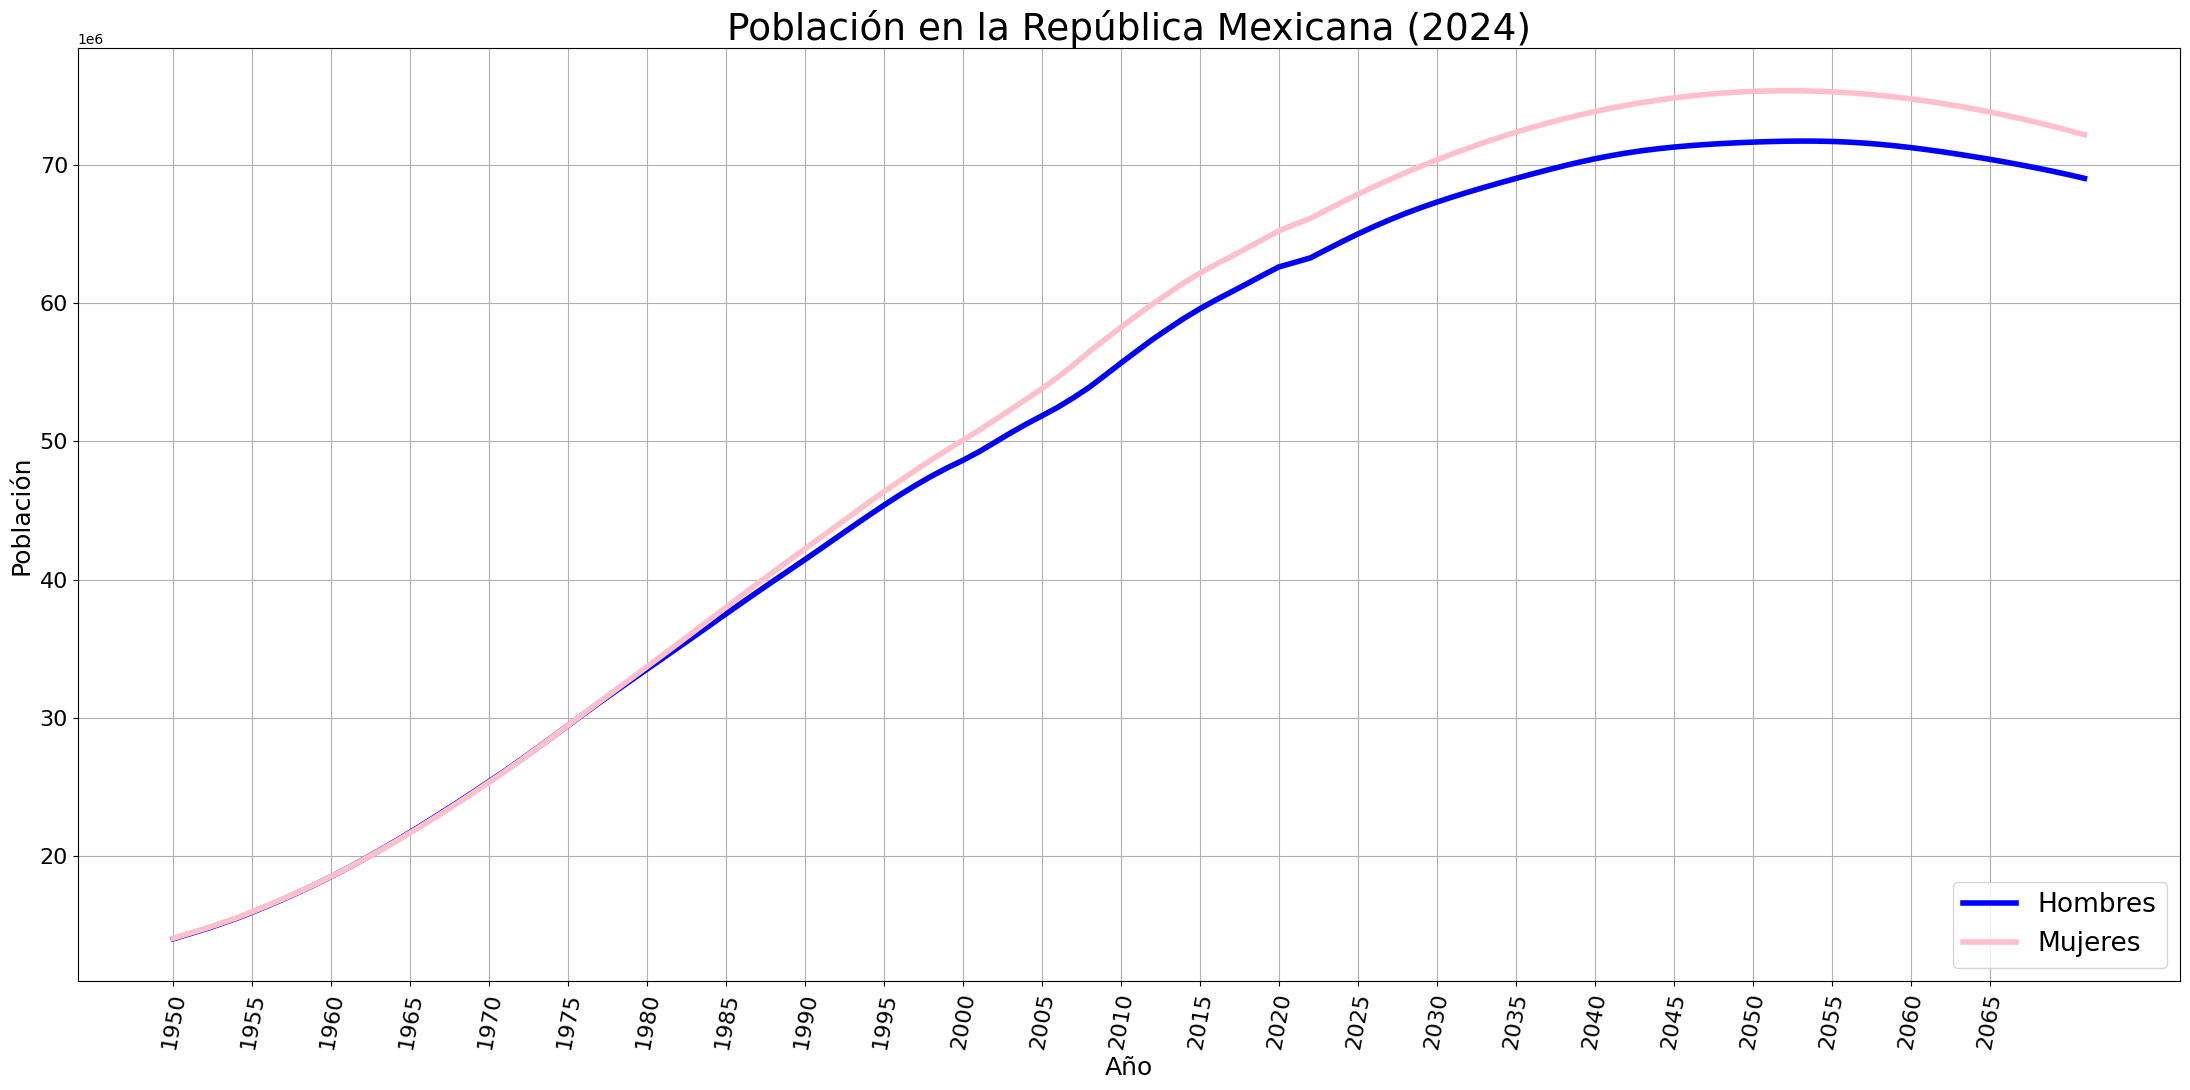

In [36]:
plt.figure(figsize=(22,11))

plt.plot(df_sexo_entidad[df_sexo_entidad["SEXO"]=="Hombres"]["AÑO"],df_sexo_entidad[df_sexo_entidad["SEXO"]=="Hombres"]["POBLACION"], color="blue",label="Hombres", linewidth=4)
plt.plot(df_sexo_entidad[df_sexo_entidad["SEXO"]=="Mujeres"]["AÑO"],df_sexo_entidad[df_sexo_entidad["SEXO"]=="Mujeres"]["POBLACION"], color="pink",label="Mujeres", linewidth=4)

plt.title("Población en la República Mexicana (2024)",fontsize=27)

plt.xlabel("Año",fontsize=18)
plt.ylabel("Población",fontsize=18)
plt.xticks(range(1950,2070,5),fontsize=16,rotation=80)
plt.yticks(fontsize=16)
plt.ticklabel_format(style="sci", axis="y", scilimits=(6,6))

plt.tight_layout()
plt.grid()
plt.legend(loc="lower right", fontsize=19)
plt.show()

Observamos en las líneas de tendencia pequeñas perturbaciones que hacen incapie a problemáticas que se vivieron en ese año; el más reciente es en 2021 con la pandemia que se vivió de COVID-19.
